In [34]:
%matplotlib inline
import scipy.signal as sig      # import de la librairie signal (outils pour l'analyse des filtres)
import numpy as np              # import de la librairie numpy pour la gestion des tableaux
import matplotlib.pyplot as plt # permet l'affichage des courbes

## Création de l'objet TransferFunction

En Python, il est possible d'analyser un filtre numérique en utilisant l'objet `TransferFunction`. Le constructeur de cet objet prend trois arguments:

* les coefficients $b_k$ du numérateur (liste python)
* les coefficients $a_l$ du dénominateur (liste python)
* la periode d'échantillonnage du signal en entrée `d_t` (en seconde)

A titre d'illustration, l'implémentation de la fonction de transfert:

$$H(z)=\frac{2+z^{-1}}{1-0.5z^{-1}}$$

s'obtient de la manière suivante (avec `d_t` fixé arbitrairement à 0.1):

In [35]:
tf=sig.TransferFunction([2,1], [1, -0.5], dt=0.1)  # creation d'un filtre

** Remarque: ** Lors de la construction de l'objet `TransferFunction`, la seconde liste (coefficients $a_l$) doit comporter au minimum autant d'élements que la première liste (coefficients $b_k$). Dans le cas d'un filtre FIR, il est possible de créer rapidement la seconde liste de la manière suivante:

In [36]:
num=[1,0,.5,2,0.5,0.3]
den=np.zeros(len(num))    #creation d'un vecteur de même taille que num ne contenant que des 0
den[0]=1                  # on fixe a_0 à 1
print("numerateur: {}".format(num))
print("denominateur: {}".format(den))

numerateur: [1, 0, 0.5, 2, 0.5, 0.3]
denominateur: [ 1.  0.  0.  0.  0.  0.]


## Localisation des pôles et des zéros

Pour obtenir les pôles et les zéros de la fonction de transfert, il est possible de lancer les instructions suivantes:

In [37]:
print("zeros du système: {}".format(tf.zeros))
print("poles du système: {}".format(tf.poles))

zeros du système: [-0.5]
poles du système: [ 0.5]


L'affichage des pôles et des zéros dans le plan complexe s'obtient en utilisant la librairie `matplotlib`.

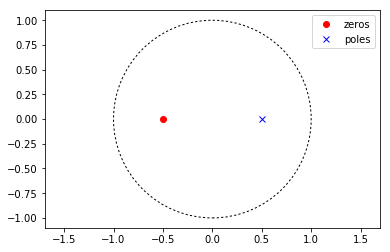

In [38]:
plt.plot(np.real(tf.zeros),np.imag(tf.zeros),'ro',label="zeros")
plt.plot(np.real(tf.poles),np.imag(tf.poles),'bx',label="poles")
plt.legend()
#ajout du cercle de rayon unité
patch=plt.Circle((0, 0), 1,color='k', linewidth=1, fill=False,linestyle =":")
ax=plt.gca()
ax.add_patch(patch)
plt.axis('equal');   #permet de conserver la même echelle sur x et y

La librairie `scipy` intègre plusieurs fonctions permettant l'analyse d'un filtre numérique. Dans les différents TP, nous utiliserons les fonctions suivantes:

* `dimpulse(tf)`: calcul de la réponse impulsionnelle, 
* `dstep(tf)`: calcul de la réponse indicielle,
* `dfreqresp(tf)`: calcul de la réponse fréquentielle,
* `dbode(tf)`: calcul du diagramme de Bode

## Réponse impulsionnelle

La réponse impulsionnelle s'obtient en utilisant la fonction `dimpulse`. Cette fonction retourne deux paramètres:
* un tableau numpy contenant le vecteur temps.
* une liste contenant la réponse impulsionnelle.

Pour afficher une réponse impulsionnelle, au lieu d'utiliser la fonction `plot`, il est préférable d'utiliser la fonction `stem` de `matplotlib`. Cette affichage permet de mieux mettre en évidence la valeur des échantillons.

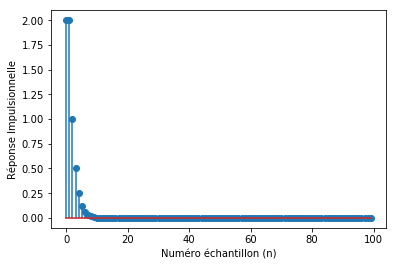

In [39]:
t,h=sig.dimpulse(tf)          #calcul de la réponse impulsionnelle

plt.stem(h[0])
plt.ylabel("Réponse Impulsionnelle")
plt.xlabel("Numéro échantillon (n)");

## Réponse Fréquentielle

Scipy intègre différentes fonctions pour le calcul de la réponse fréquentielle (`dfreqresp` et `bode`). Nous utiliserons principalement la fonction `dfreqresp`. La fonction `dfreqresp` prend en entrée un objet `TransferFunction` et renvoie deux sorties:
* un tableau numpy contenant les pulsations $\omega$,
* un tableau numpy contenant la réponse fréquentielle $H(\omega)$.

Pour obtenir le module et l'argument de la réponse fréquentielle, il est ensuite possible d'utiliser les fonctions `abs` et `angle` de `numpy`.

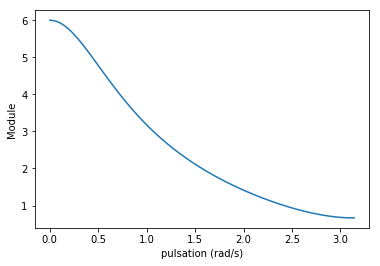

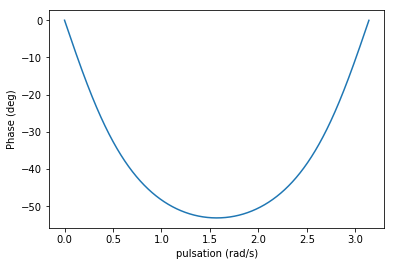

In [40]:
w, H = sig.dfreqresp(tf)
module=np.abs(H)
phase=180*np.angle(H)/np.pi  # conversion radian -> degree

#affichage via matplotlib
plt.plot(w,module)
plt.ylabel("Module")
plt.xlabel("pulsation (rad/s)")

plt.figure()
plt.plot(w,phase)
plt.ylabel("Phase (deg)")
plt.xlabel("pulsation (rad/s)");

Les réponses fréquentielles précédentes sont représentées avec une échelle linéaire. Il est parfois intéressant d'utiliser une échelle logarithmique. Les instructions suivantes montrent comment passer le gain de l'échelle linéaire à l'échelle logarithmique.


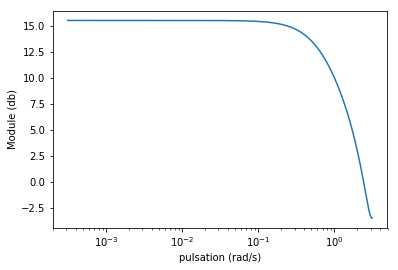

In [41]:
plt.semilogx(w,20*np.log10(module))
plt.ylabel("Module (db)")
plt.xlabel("pulsation (rad/s)");

## Réponse à une entrée quelconque

Avec scipy, la réponse d'un filtre à une entrée quelconque s'obtient en utilisant la fonction `lfilter` de la librairie `signal`. Cette fonction prend trois entrées:
* les coefficients `b_k` du filtre,
* les coefficients `a_l` du filtre,
* le signal `x` en entrée du filtre.

A titre d'illustration, lorsqu'une sinusoide de pulsation $\omega_0=0.1$ rad/s est appliquée en entrée, la réponse du filtre s'obtient de la manière suivante:

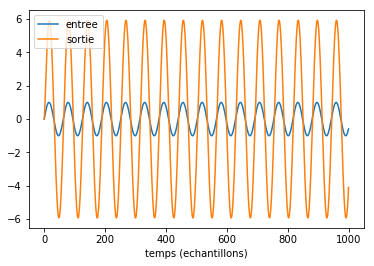

In [42]:
n_vect=np.arange(1000)

x=np.sin(0.1*n_vect)
b=np.array([2,1])     #definition des coefficients de la partie non récursive
a=np.array([1, -0.5]) #definition des coefficients de la partie récursive

y=sig.lfilter(b,a,x)
plt.plot(x,label="entree")
plt.plot(y,label="sortie")
plt.xlabel("temps (echantillons)")
plt.legend();

## Affichage des spectres

Lorsque nous filtrons un signal, le contenu fréquentiel du signal est modifié. Pour analyser l'effet d'un filtre, il peut être interessant de visualiser le contenu fréquentiel avant et après filtrage. En pratique, la visualisation du contenu fréquentiel peut s'obtenir en utilisant la technique du périodogramme.

$$P_{xx}(f)=\frac{1}{N}\left|\sum_{n=0}^{N-1} x[n]e^{2j\pi f}\right|^2$$

Sous Scipy, le périodogramme s'obtient en utilisant la fonction `periodogram` de la librairie `signal`.

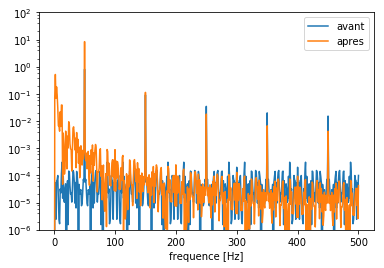

In [43]:
#generation du signal
fe=1000
t=np.arange(0,1,1/fe)
x=sig.square(2*np.pi*50*t)

#filtrage du signal
y=sig.lfilter([1],[1,-0.99],x)

# affichage des spectres
f, Pxx = sig.periodogram(x, fe)
f2, Pyy = sig.periodogram(y, fe)
plt.semilogy(f, Pxx,label="avant")
plt.semilogy(f2, Pyy,label="apres")
plt.ylim([1e-6, 1e2])
plt.xlabel('frequence [Hz]')
plt.legend();

## Export Audio des résultats

En plus de l'affichage des différentes réponses, `scipy` permet également d'exporter les signaux dans un format audio. L'exemple suivant montre comment exporter une sinusoide au format `wav`, puis comment écouter le résultat directement dans le navigateur via la librairie `display` d'Ipython.



In [44]:
from IPython.display import Audio
from scipy.io.wavfile import write

#generation du signal
fe=44100
t=np.arange(0,1,1/fe)
x=np.sin(2*np.pi*200*t)     #sinusoide à 1kHz
write("son.wav",fe,x)            #export du son

Audio("son.wav")